In [1]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
def load_audio_files(file_paths):
    features = []
    for file_path in file_paths:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs = np.mean(mfccs.T, axis=0)  # Среднее значение по временной оси
        features.append(mfccs)
    return np.array(features)

# Пример путей к звуковым файлам
audio_directory = 'birds-for_classes'  # Замените на ваш путь
file_paths = [os.path.join(audio_directory, f) for f in os.listdir(audio_directory) if f.endswith(('.wav'))]

X = load_audio_files(file_paths)

# Преобразуем в формат, подходящий для CNN
X = X.reshape(X.shape[0], X.shape[1], 1)  # Добавляем размерность для канала


In [15]:
from tensorflow.keras.layers import InputLayer
model = Sequential()
model.add(InputLayer(shape=(13, 1, 1)))
model.add(Conv2D(32, (1, 1), activation='relu'))  
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [17]:
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Извлекаем признаки для кластеризации
X_flat = X.reshape(X.shape[0], -1)  # Преобразуем в 2D для KMeans

# Применяем KMeans для кластеризации
num_clusters = 4  # Задайте количество кластеров
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_flat)

# Получаем метки кластеров
labels = kmeans.labels_
print("Labels:", labels)


Labels: [0 2 2 2 2 2 2 0 1 1 0 1 1 1 1 1 0 0 0 0 3 2 2]


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


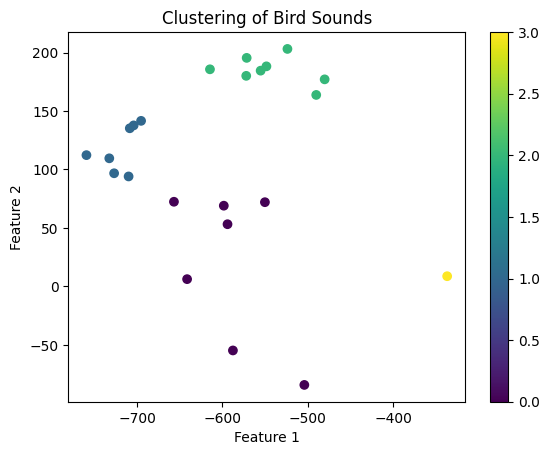

In [23]:
# Визуализация кластеров
if X_flat.shape[1] >= 2:  # Убедитесь, что у вас есть хотя бы два признака для визуализации
    plt.scatter(X_flat[:, 0], X_flat[:, 1], c=labels, cmap='viridis')
    plt.title('Clustering of Bird Sounds')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()


In [27]:
all_files = os.listdir(audio_directory)

In [29]:
# Создаем DataFrame
import pandas as pd
data = {
    'Audio File': [os.path.basename(file) for file in all_files],  # Извлекаем только имена файлов
    'Cluster': labels  # Номера кластеров
}

df = pd.DataFrame(data)

# Выводим DataFrame
print(df)

   Audio File  Cluster
0       1.wav        0
1     10​.wav        2
2     11​.wav        2
3     12​.wav        2
4     13​.wav        2
5     14​.wav        2
6      15.wav        2
7      17.wav        0
8      18.wav        1
9      19.wav        1
10      2.wav        0
11     20.wav        1
12     21.wav        1
13     22.wav        1
14     23.wav        1
15     24.wav        1
16      3.wav        0
17      4.wav        0
18      5.wav        0
19      6.wav        0
20     7​.wav        3
21      8.wav        2
22     9​.wav        2
